<h1>Accessing <a href="http://www.uniprot.org/">UniProt</a> Web Services from BioServices</h1>

<p>This notebook illustrates some of the uniprot web services using BioServices uniprot module. We show how to </p>
<ul>
<li>Search for a known entry </li>
<li>Search for a key word given an organism </li>
<li>Retrieve i a dataframe information related to a list of known entries </li>
<li>Perform a mapping between databases</li>
<li>Fetch a FASTA sequence</li>
</ul>



In [1]:
from bioservices import *
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


### UniProt service can help us getting  information about a given protein

In [2]:
u = UniProt()

If you already know the entry name, just type it:

In [3]:
res = u.search("ZAP70_HUMAN")
print(res)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P43403	ZAP70_HUMAN	reviewed	Tyrosine-protein kinase ZAP-70 (EC 2.7.10.2) (70 kDa zeta-chain associated protein) (Syk-related tyrosine kinase)	ZAP70 SRK	Homo sapiens (Human)	619



Otherwise, let us search the entire database. We can restrict the search to human species, and print results limited to 3 best matches and sub-selection of columns/information

In [4]:
print u.search('zap70+AND+organism:9606', frmt='tab', limit=3,
               columns="entry name, length, genes")

Entry name	Length	Gene names
ZAP70_HUMAN	619	ZAP70 SRK
B4E0E2_HUMAN	185	
RHOH_HUMAN	191	RHOH ARHH TTF



In [5]:
print(res)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P43403	ZAP70_HUMAN	reviewed	Tyrosine-protein kinase ZAP-70 (EC 2.7.10.2) (70 kDa zeta-chain associated protein) (Syk-related tyrosine kinase)	ZAP70 SRK	Homo sapiens (Human)	619



#### Experimental: using pandas to scan the output of the search function

In [6]:
u.debugLevel = "INFO"
u.timeout = 10   # some queries are long and requires much more time; default is 1000 seconds


Accession via entry name (e.g., ZAP70_HUMAN) is faster than by Entry (e.g., P43403)

In [7]:
df = u.get_df(["ZAP70_HUMAN", "GRAB_HUMAN", "JUN_HUMAN", "MK15_HUMAN"])
df

INFO:root:fetching information from uniprot for 4 entries
INFO:root:uniprot.get_df 1/1


,PubMed ID,Comments,Cross-reference,Domains,Domain count,EC number,Entry,Entry name,Sequence annotation (Features),Features,...,Pathway,Protein names,Status,Sequence,3D,Version,Virus hosts,Taxonomic lineage IDs,Date of last sequence modification,Proteomes
0,"[11875070, 16484222, 15489334, 16624805, 19369...","[Alternative products (1), Catalytic activity ...",NaN,[Protein kinase domain (1)],0,2.7.11.24,Q8TD08,MK15_HUMAN,NaN,Active site (1); Alternative sequence (4); Bin...,...,NaN,Mitogen-activated protein kinase 15 (MAP kinas...,reviewed,MCTVVDPRIVRRYLLRRQLGQGAYGIVWKAVDRRTGEVVAIKKIFD...,NaN,120,NaN,9606,2002-06-01,UP000005640: Chromosome 8
1,"[1423621, 14985102, 15815621, 15489334, 812472...","[Alternative products (1), Catalytic activity ...",NaN,"[Protein kinase domain (1), SH2 domains (2)]",0,2.7.10.2,P43403,ZAP70_HUMAN,NaN,Active site (1); Alternative sequence (3); Bet...,...,NaN,Tyrosine-protein kinase ZAP-70 (EC 2.7.10.2) (...,reviewed,MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGY...,X-ray crystallography (13),186,NaN,9606,1995-11-01,UP000005640: Chromosome 2
2,"[2953813, 3258865, 3261871, 2788607, 2365998, ...","[Catalytic activity (1), Enzyme regulation (1)...",NaN,[Peptidase S1 domain (1)],0,3.4.21.79,P10144,GRAB_HUMAN,NaN,Active site (3); Beta strand (13); Chain (1); ...,...,NaN,Granzyme B (EC 3.4.21.79) (C11) (CTLA-1) (Cath...,reviewed,MQPILLLLAFLLLPRADAGEIIGGHEAKPHSRPYMAYLMIWDQKSL...,X-ray crystallography (2),177,NaN,9606,2011-01-11,UP000005640: Chromosome 14
3,"[3194415, 2825349, 16710414, 15489334, 1846781...","[Function (1), Post-translational modification...",NaN,[BZIP (basic-leucine zipper) domain (1)],0,NaN,P05412,JUN_HUMAN,NaN,Chain (1); Domain (1); Helix (1); Modified res...,...,NaN,Transcription factor AP-1 (Activator protein 1...,reviewed,MTAKMETTFYDDALNASFLPSESGPYGYSNPKILKQSMTLNLADPV...,NMR spectroscopy (1); X-ray crystallography (5),204,NaN,9606,1989-10-01,UP000005640: Chromosome 1


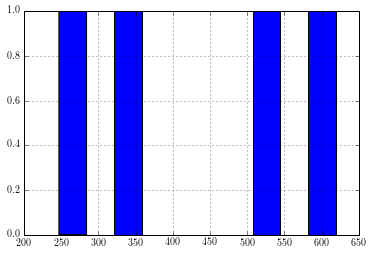

In [8]:
df['Length'].hist()


### UniProt service can help us getting the FASTA sequence and more generally information about a given protein

In [11]:
sequence = u.retrieve("P43403", "fasta")

In [12]:
print(sequence)

>sp|P43403|ZAP70_HUMAN Tyrosine-protein kinase ZAP-70 OS=Homo sapiens GN=ZAP70 PE=1 SV=1
MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGYVLSLVHDVRFHHFP
IERQLNGTYAIAGGKAHCGPAELCEFYSRDPDGLPCNLRKPCNRPSGLEPQPGVFDCLRD
AMVRDYVRQTWKLEGEALEQAIISQAPQVEKLIATTAHERMPWYHSSLTREEAERKLYSG
AQTDGKFLLRPRKEQGTYALSLIYGKTVYHYLISQDKAGKYCIPEGTKFDTLWQLVEYLK
LKADGLIYCLKEACPNSSASNASGAAAPTLPAHPSTLTHPQRRIDTLNSDGYTPEPARIT
SPDKPRPMPMDTSVYESPYSDPEELKDKKLFLKRDNLLIADIELGCGNFGSVRQGVYRMR
KKQIDVAIKVLKQGTEKADTEEMMREAQIMHQLDNPYIVRLIGVCQAEALMLVMEMAGGG
PLHKFLVGKREEIPVSNVAELLHQVSMGMKYLEEKNFVHRDLAARNVLLVNRHYAKISDF
GLSKALGADDSYYTARSAGKWPLKWYAPECINFRKFSSRSDVWSYGVTMWEALSYGQKPY
KKMKGPEVMAFIEQGKRMECPPECPPELYALMSDCWIYKWEDRPDFLTVEQRMRACYYSL
ASKVEGPPGSTQKAEAACA



Alternatively, you can just use the following function to get the fasta sequence:

In [13]:
u.get_fasta_sequence("P43403")

u'MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGYVLSLVHDVRFHHFPIERQLNGTYAIAGGKAHCGPAELCEFYSRDPDGLPCNLRKPCNRPSGLEPQPGVFDCLRDAMVRDYVRQTWKLEGEALEQAIISQAPQVEKLIATTAHERMPWYHSSLTREEAERKLYSGAQTDGKFLLRPRKEQGTYALSLIYGKTVYHYLISQDKAGKYCIPEGTKFDTLWQLVEYLKLKADGLIYCLKEACPNSSASNASGAAAPTLPAHPSTLTHPQRRIDTLNSDGYTPEPARITSPDKPRPMPMDTSVYESPYSDPEELKDKKLFLKRDNLLIADIELGCGNFGSVRQGVYRMRKKQIDVAIKVLKQGTEKADTEEMMREAQIMHQLDNPYIVRLIGVCQAEALMLVMEMAGGGPLHKFLVGKREEIPVSNVAELLHQVSMGMKYLEEKNFVHRDLAARNVLLVNRHYAKISDFGLSKALGADDSYYTARSAGKWPLKWYAPECINFRKFSSRSDVWSYGVTMWEALSYGQKPYKKMKGPEVMAFIEQGKRMECPPECPPELYALMSDCWIYKWEDRPDFLTVEQRMRACYYSLASKVEGPPGSTQKAEAACA'

### UniProt service has also a mapping utility that can be called via BioServices

The are 3 parameters required. The input database code, the output database code and query as a list of valid identifiers

In [14]:
u.mapping("ACC", "KEGG_ID", 'P43403')

defaultdict(list, {u'P43403': [u'hsa:7535']})

In [15]:
u.mapping("ID", "PDB_ID", "P43403")

defaultdict(list,
            {u'P43403': [u'1FBV',
              u'1M61',
              u'1U59',
              u'2CBL',
              u'2OQ1',
              u'2OZO',
              u'2Y1N',
              u'3ZNI',
              u'4A4B',
              u'4A4C',
              u'4K2R',
              u'4XZ0',
              u'4XZ1']})

<hr>
For more information, please see <a href="http://pythonhosted.org//bioservices/references.html?bioservices.uniprot.UniProt#module-bioservices.uniprot">bioservices.uniprot module documentation.</a>